# 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np

# 2. Loading and Analysing the Dataset

In [3]:
data = pd.read_csv('Crop_recommendation.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [9]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [10]:
data.shape

(2200, 8)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   int32  
dtypes: float64(4), int32(1), int64(3)
memory usage: 129.0 KB


In [12]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,10.500000
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,6.345731
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,0.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,5.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,10.500000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,16.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,21.000000


In [13]:
data.label.value_counts()

label
20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: count, dtype: int64


# 3. Data Preprocessing

In [14]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [15]:
label_encoder = LabelEncoder()
le = LabelEncoder().fit(data['label'])

In [16]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)


{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21}


In [17]:

data['label'] = le.transform(data['label'])

In [18]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


# 4. Standardize features

In [19]:

scaler = StandardScaler()
X = data.drop('label', axis=1)
y = data['label']

In [20]:
X_scaled = scaler.fit_transform(X)

# 5. Splitting the Data

In [21]:

from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [23]:
X_train

array([[-0.90904306, -1.13294593, -0.67439784, ...,  0.92995964,
         0.20168816, -0.00945465],
       [-0.36716896,  0.77739624, -0.57565467, ..., -0.09586864,
         0.87166712, -0.6197892 ],
       [-1.17998011,  0.59545889, -0.45716288, ..., -0.37511658,
         1.05791806, -1.06022921],
       ...,
       [-1.07160529, -0.5264881 , -0.33867109, ..., -0.88514041,
         0.00771459, -0.05833171],
       [-1.07160529,  2.14192637,  3.07784228, ...,  0.38567125,
        -0.14001591, -0.58354176],
       [-0.50263749,  0.74707335, -0.51640878, ..., -0.4100052 ,
         0.6947325 , -0.91097967]])

In [24]:
X_test

array([[ 1.36682815, -1.10262304, -0.02269297, ...,  1.04444468,
        -0.36758967, -1.40420762],
       [ 1.28554704, -1.37552907,  0.05630155, ...,  0.67572532,
        -0.27158762, -0.98338819],
       [ 0.22889255,  0.26190709,  0.01680429, ...,  0.98254107,
         0.61002851,  0.20591921],
       ...,
       [ 1.90870225, -0.19293629, -0.63490057, ...,  0.3510508 ,
         1.62034379, -0.56356614],
       [ 1.77323373, -0.04132183, -0.57565467, ...,  0.17475944,
        -0.45873834, -0.66216828],
       [-1.23416752,  0.44384444, -0.55590604, ..., -1.72403329,
        -0.44950961,  0.94469124]])

# 6. Graph Analysis

In [25]:
X_train.shape, X_test.shape

((1760, 7), (440, 7))

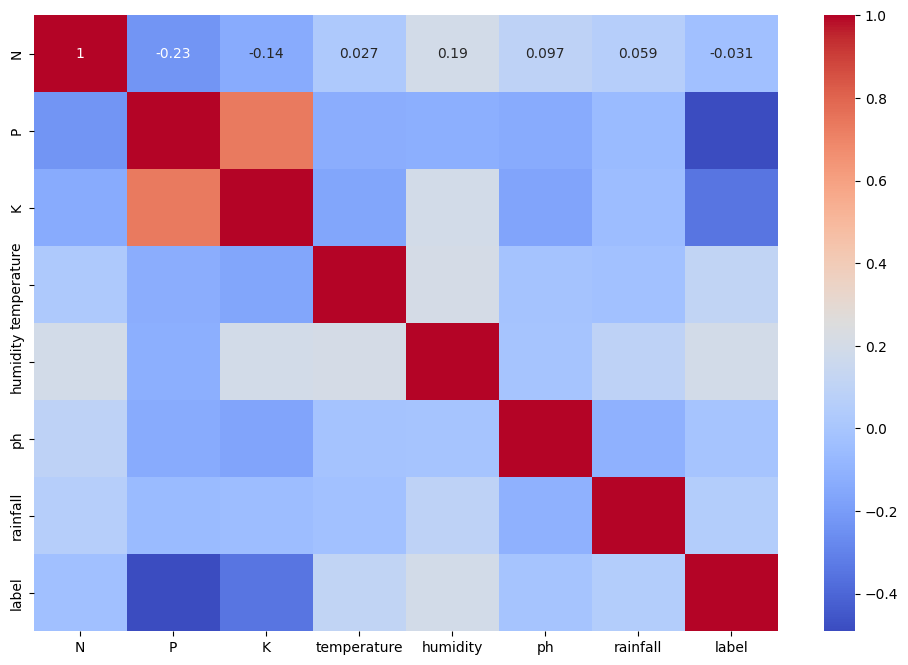

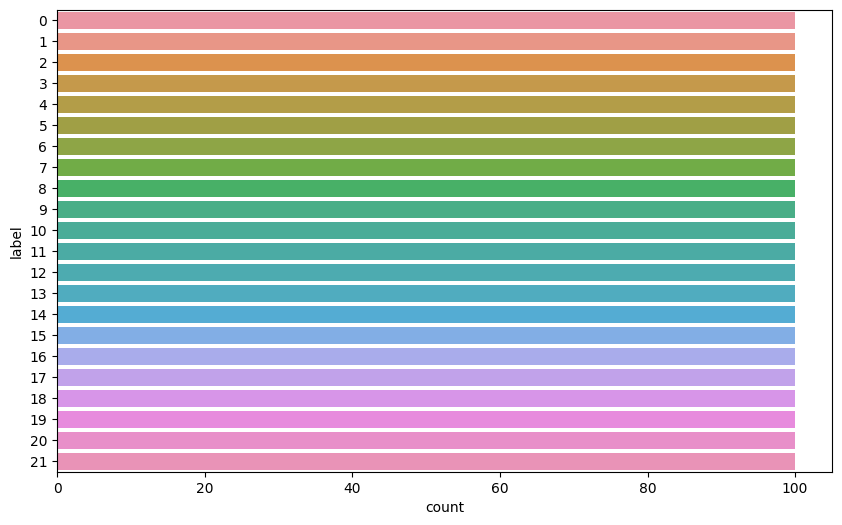

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Plot crop distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=data['label'])
plt.show()



# 7 Creating the Pipeline


Importing the Important Libraries

In [27]:

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [29]:
#!pip install xgboost

# KNN Classifier

In [30]:
step1 = ColumnTransformer(transformers=[
    ('scal_tnf',MinMaxScaler(),[0,1,2,3,4,5,6]),
],remainder='passthrough')

step2 = KNeighborsClassifier()

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,y_pred))

Accuracy:  0.9681818181818181


# SVM Classifier

In [31]:
step1 = ColumnTransformer(transformers=[
    ('scal_tnf',MinMaxScaler(),[0,1,2,3,4,5,6]),
],remainder='passthrough')

step2 = SVC()

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,y_pred))

Accuracy:  0.9681818181818181


# Decision Tree Classifier

In [32]:
step1 = ColumnTransformer(transformers=[
    ('scal_tnf',MinMaxScaler(),[0,1,2,3,4,5,6]),
],remainder='passthrough')

step2 = DecisionTreeClassifier(max_depth=10)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,y_pred))

Accuracy:  0.9886363636363636


# RandomForest Classifier

In [33]:

label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.85      1.00      0.92        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [37]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Train with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)


Best parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}


RandomForestClassifier(max_depth=20, min_samples_split=10)

In [38]:

step1 = ColumnTransformer(transformers=[
    ('scal_tnf',MinMaxScaler(),[0,1,2,3,4,5,6]),
],remainder='passthrough')

step2 = RandomForestClassifier(max_depth=20,
                               min_samples_split=2,
                               n_estimators=100)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,y_pred))

Accuracy:  0.9931818181818182


# Extra Tree Classifier

In [39]:

step1 = ColumnTransformer(transformers=[
    ('scal_tnf',MinMaxScaler(),[0,1,2,3,4,5,6]),
],remainder='passthrough')

step2 = ExtraTreesClassifier(n_estimators=100,
                              random_state=3,
                              max_features=0.75,
                              max_depth=15)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,y_pred))

Accuracy:  0.990909090909091


# Gradient Boosting Classifier

In [40]:
step1 = ColumnTransformer(transformers=[
    ('scal_tnf',MinMaxScaler(),[0,1,2,3,4,5,6]),
],remainder='passthrough')

step2 = GradientBoostingClassifier()

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,y_pred))

Accuracy:  0.9818181818181818


# XgBoost Classifier

In [41]:
step1 = ColumnTransformer(transformers=[
    ('scal_tnf',MinMaxScaler(),[0,1,2,3,4,5,6]),
],remainder='passthrough')

step2 = XGBClassifier(n_estimators=50,max_depth=10,learning_rate=0.5)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,y_pred))

Accuracy:  0.9886363636363636


# We are finally going to use this Random Forest Classfier Model as it's giving highest accuracy of 99.31% on the testing data

In [42]:
import joblib

# Save the best model, scaler, and label encoder
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']